In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
downloaded = drive.CreateFile({'id':'1e3DoVPJW8zlaK25yJSQkhKkwPaAxCh6y'}) # replace the id with id of file you want to access
downloaded.GetContentFile('genderbasedmodel.csv') 


In [5]:
import pandas as pd
xyz = pd.read_csv('genderbasedmodel.csv') 
print(xyz.head(1))


   survived  pclass              name   sex  ...  ticket    fare  cabin embarked
0         0       3  Kelly, Mr. James  male  ...  330911  7.8292    NaN        Q

[1 rows x 11 columns]


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math 

titanic_data = pd.read_csv('genderbasedmodel.csv')
titanic_data.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
print("# of passengers in original data:" +str(len(titanic_data.index)))

# of passengers in original data:418


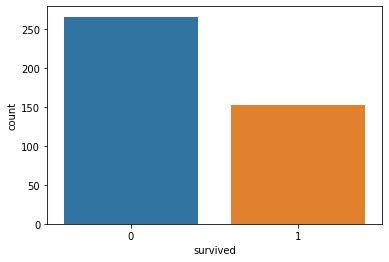

In [9]:
# # Analyze data

sns.countplot(x="survived", data=titanic_data)

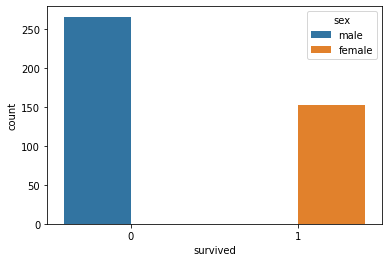

In [10]:
sns.countplot(x="survived", hue="sex", data=titanic_data)

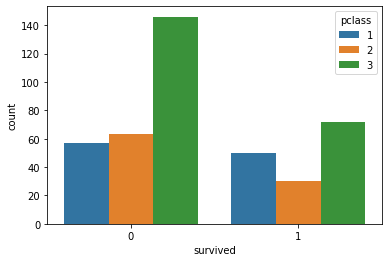

In [11]:
sns.countplot(x="survived", hue="pclass", data=titanic_data)

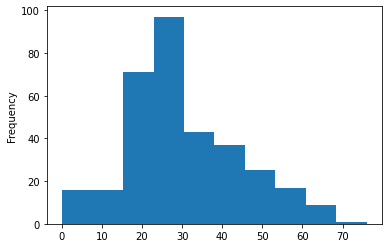

In [12]:
titanic_data["age"].plot.hist()

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  418 non-null    int64  
 1   pclass    418 non-null    int64  
 2   name      418 non-null    object 
 3   sex       418 non-null    object 
 4   age       332 non-null    float64
 5   sibsp     418 non-null    int64  
 6   parch     418 non-null    int64  
 7   ticket    418 non-null    object 
 8   fare      417 non-null    float64
 9   cabin     91 non-null     object 
 10  embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
## Data Wrangling

titanic_data.isnull()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [15]:
titanic_data.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64

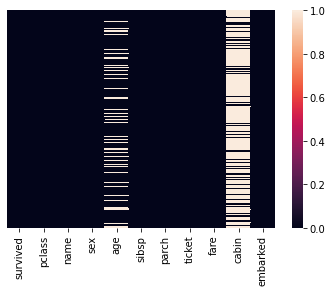

In [22]:
sns.heatmap(titanic_data.isnull(), yticklabels=False)

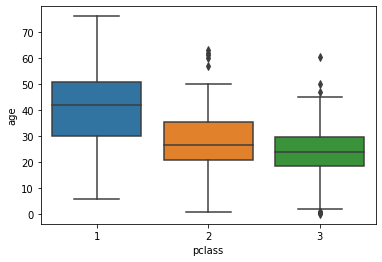

In [19]:
sns.boxplot(x="pclass", y="age",data=titanic_data)

In [23]:
titanic_data.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
titanic_data.drop("cabin",axis=1,inplace=True)

In [36]:
titanic_data.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [0]:
titanic_data.dropna(inplace=True)

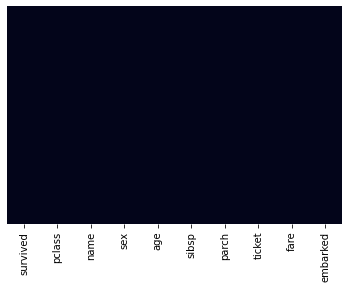

In [38]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [40]:
titanic_data.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [42]:
titanic_data.head(2)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [45]:
#converting numerical into categorical

sex= pd.get_dummies(titanic_data['sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,1
3,1
4,0


In [47]:
embark=pd.get_dummies(titanic_data["embarked"],drop_first=True)
embark.head(5)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [48]:
pcl=pd.get_dummies(titanic_data["pclass"],drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [0]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [52]:
titanic_data.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S,2,3,male,Q,S,2,3
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1,1,1,0,0,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1,0,0,1,0,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0,1,1,0,1,0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1,1,0,1,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1,0,0,1,0,1


In [0]:
titanic_data.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [64]:
titanic_data.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1,0,0,1,0,1


In [0]:
titanic_data.drop(['pclass'],axis=1,inplace=True)

In [0]:
## Train Data

x = titanic_data.drop("survived", axis=1)
y = titanic_data["survived"]

In [0]:
!pip install -q matplotlib-venn

In [0]:
!apt-get -qq install -y libfluidsynth1

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel=LogisticRegression()

In [91]:
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(x_test)

In [0]:
from sklearn.metrics import classification_report

In [97]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        57\n           1       1.00      1.00      1.00        43\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [0]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(y_test,predictions)

array([[57,  0],
       [ 0, 43]])

In [0]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test,predictions)

1.0